In [1]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import requests
import warnings

warnings.filterwarnings('ignore')

In [2]:
# sdg-tool endpoint (source: https://github.com/osdg-ai/osdg-tool/tree/pre-release?tab=readme-ov-file)
osdgtool_url = 'http://osdg-tool:5000/tag'

sdg_dict = {'SDG_1': 'GOAL 1: No Poverty',
            'SDG_2': 'GOAL 2: Zero Hunger',
            'SDG_3': 'GOAL 3: Good Health and Well-being',
            'SDG_4': 'GOAL 4: Quality Education',
            'SDG_5': 'GOAL 5: Gender Equality',
            'SDG_6': 'GOAL 6: Clean Water and Sanitation',
            'SDG_7': 'GOAL 7: Affordable and Clean Energy',
            'SDG_8': 'GOAL 8: Decent Work and Economic Growth',
            'SDG_9': 'GOAL 9: Industry, Innovation and Infrastructure',
            'SDG_10': 'GOAL 10: Reduced Inequality',
            'SDG_11': 'GOAL 11: Sustainable Cities and Communities',
            'SDG_12': 'GOAL 12: Responsible Consumption and Production',
            'SDG_13': 'GOAL 13: Climate Action',
            'SDG_14': 'GOAL 14: Life Below Water',
            'SDG_15': 'GOAL 15: Life on Land',
            'SDG_16': 'GOAL 16: Peace and Justice Strong Institutions',
            'SDG_17': 'GOAL 17: Partnerships to achieve the Goal',
            'SDG_None': 'Publication not matched to any Goal'}

In [5]:
# publications in LW spcols (with title and abstract info)
pub_info_df = execute_to_df("3_publication_info.sparql")
pub_info_df

#pub_info_df.groupby('publication').nunique()

,publication,publish_date,title,abstract
0,https://marineinfo.org/id/publication/244397,2015-01-01,Fishing for data and sorting the catch: assess...,Being able to assess the quality and level of ...
1,https://marineinfo.org/id/publication/317545,2019-01-01,Near disappearance of the Angelshark <i>Squati...,Marine extinctions are particularly difficult ...
2,https://marineinfo.org/id/publication/321803,2020-01-01,Lessepsian fish invasion in Mediterranean mari...,"Mediterranean marine protected areas (MPAs), d..."
3,https://marineinfo.org/id/publication/229318,2013-01-01,IMDIS 2013 International Conference on Marine ...,NaN
4,https://marineinfo.org/id/publication/261508,2018-01-01,First report on vertebral abnormality in the f...,Vertebral deformities are reported in fivebear...
...,...,...,...,...
10767,https://marineinfo.org/id/publication/45425,NaN,Molecular Ecology,NaN
10768,https://marineinfo.org/id/publication/43700,NaN,Progress in Oceanography,NaN
10769,https://marineinfo.org/id/publication/43261,NaN,Journal of Sea Research,NaN
10770,https://marineinfo.org/id/publication/42768,NaN,Conservation Biology,NaN


In [6]:
# publications in LW spcols within the defined time range (with title and abstract info)
## set date range
START_YEAR = 2012
END_YEAR = 2024

## manipulate date datatype
pub_info_df['publish_date'] = pd.to_datetime(pub_info_df['publish_date'])
pub_info_df['publish_year'] = pub_info_df['publish_date'].dt.year

## assess publications with missing publish_date
pubs_with_missing_publish_year = len(pub_info_df[pub_info_df['publish_year'].isnull()])
print(f'number of publications with missing publish date: {pubs_with_missing_publish_year}')

## replace all NaN values with zeros & convert from float to int
pub_info_df['publish_year'] = pub_info_df['publish_year'].fillna(0).astype(int)

## select date range
pub_info_df_12_24 = pub_info_df[ (pub_info_df['publish_year'] >= START_YEAR) & (pub_info_df['publish_year'] <= END_YEAR) ]

number of publications with missing publish date: 348


In [7]:
pub_info_df_12_24
#pub_info_df_12_24.groupby('publication').nunique()

,publication,publish_date,title,abstract,publish_year
0,https://marineinfo.org/id/publication/244397,2015-01-01,Fishing for data and sorting the catch: assess...,Being able to assess the quality and level of ...,2015
1,https://marineinfo.org/id/publication/317545,2019-01-01,Near disappearance of the Angelshark <i>Squati...,Marine extinctions are particularly difficult ...,2019
2,https://marineinfo.org/id/publication/321803,2020-01-01,Lessepsian fish invasion in Mediterranean mari...,"Mediterranean marine protected areas (MPAs), d...",2020
3,https://marineinfo.org/id/publication/229318,2013-01-01,IMDIS 2013 International Conference on Marine ...,NaN,2013
4,https://marineinfo.org/id/publication/261508,2018-01-01,First report on vertebral abnormality in the f...,Vertebral deformities are reported in fivebear...,2018
...,...,...,...,...,...
10726,https://marineinfo.org/id/publication/310218,2019-01-01,Proceedings of the 1<sup>st</sup> Mediterranea...,NaN,2019
10727,https://marineinfo.org/id/publication/314397,2019-01-01,"54th European Marine Biology Symposium Dublin,...",NaN,2019
10753,https://marineinfo.org/id/publication/355622,2022-01-01,55th European Marine Biology Symposium 19 – 23...,NaN,2022
10756,https://marineinfo.org/id/publication/336685,2021-01-01,"The Second World Ocean Assessment, Volume 1",NaN,2021


In [8]:
# combine textual info
pub_info_df_12_24['text'] = pub_info_df_12_24['title'] + ' | ' + pub_info_df_12_24['abstract']

In [9]:
# initialize empty columns
pub_info_df_12_24['sdgs'] = {}
pub_info_df_12_24['result'] = {}

# for each publication, get SDGs associated with textual information 
for i in range(len(pub_info_df_12_24)):   
    try:
        data = {'text': pub_info_df_12_24.loc[i, "text"] , 'detailed': False}
        response = requests.post(osdgtool_url, json=data)
        result = response.json()
        if result['result']:
            pub_info_df_12_24.at[i,'sdgs'] = {item['sdg']: 1 for item in list(result['result'])}
            pub_info_df_12_24.at[i,'result'] = result['result']
        else:
            pub_info_df_12_24.at[i,'result'] = result['result']
            
    except:
        pass

In [31]:
pub_sdg = pub_info_df_12_24[['publication','sdgs']]
pub_sdg.set_index('publication', inplace=True)
pub_sdg = pub_sdg['sdgs'].apply(pd.Series)
pub_sdg.drop(0, axis=1, inplace=True)

In [32]:
sdg_pubcount = pub_sdg.count().reset_index().rename(columns={'index':'SDG', 0:'count'})
sdg_pubcount

,SDG,count
0,SDG_14,3668
1,SDG_2,2862
2,SDG_15,1566
3,SDG_1,34
4,SDG_3,2646
5,SDG_12,130
6,SDG_11,751
7,SDG_7,295
8,SDG_6,730
9,SDG_9,488


In [33]:
sdg_pubcount['sdg_int'] = [int(word.split('_')[-1]) for word in sdg_pubcount['SDG']]
sdg_pubcount = sdg_pubcount.sort_values(by='sdg_int')

#### The numbers of LifeWatch publications linked to the different Sustainable Development Goals (1-16).

(Sustainable Development Goal 17: Partnerships to achieve the Goal’ is not included in this analysis.)

In [34]:
# Table 
sdg_pubcount_ = sdg_pubcount.copy().drop('sdg_int', axis=1)
sdg_pubcount_['SDG'] = [ sdg_dict[sdg] for sdg in sdg_pubcount['SDG'] if sdg in sdg_dict.keys()]
sdg_pubcount_

,SDG,count
3,GOAL 1: No Poverty,34
1,GOAL 2: Zero Hunger,2862
4,GOAL 3: Good Health and Well-being,2646
13,GOAL 4: Quality Education,28
15,GOAL 5: Gender Equality,3
8,GOAL 6: Clean Water and Sanitation,730
7,GOAL 7: Affordable and Clean Energy,295
14,GOAL 8: Decent Work and Economic Growth,51
9,"GOAL 9: Industry, Innovation and Infrastructure",488
12,GOAL 10: Reduced Inequality,145


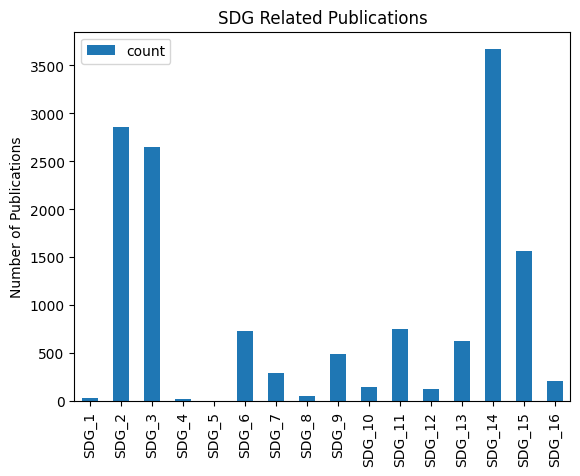

In [35]:
# Figure
ax = sdg_pubcount.plot.bar(x='SDG', y='count', rot=90, title='SDG Related Publications', ylabel= 'Number of Publications', xlabel='')